# Gold Price Prediction using Machine Learning

Goal Of Project

There are many real time series dataset present in the market. Mostly, time series dataset used in stock market. By using machine learning algorithm , prediction of future values take place. In this project, prediction of future values(30 days) taken place using LSTM.


Import libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from google.colab import files
upload = files.upload()

Saving Golddataset.csv to Golddataset (1).csv


Upload dataset

In [ ]:
data =  pd.read_csv("Golddataset.csv")

In [ ]:
data.shape

(1718, 81)

Print first 5 columns

In [ ]:
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,15-12-2011,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,16-12-2011,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,19-12-2011,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,20-12-2011,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,21-12-2011,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


Print last 5 columns data

In [ ]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
1713,24-12-2018,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,239.039993,240.839996,234.270004,...,20.650000,21.090000,21.090000,60507000,9.49,9.52,9.28,9.29,9.29,21598200
1714,26-12-2018,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,235.970001,246.179993,233.759995,...,20.530001,20.620001,20.620001,76365200,9.25,9.92,9.23,9.90,9.90,40978800
1715,27-12-2018,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,242.570007,248.289993,238.960007,...,20.700001,20.969999,20.969999,52393000,9.59,9.65,9.37,9.62,9.62,36578700
1716,28-12-2018,120.800003,121.080002,120.720001,121.059998,121.059998,6864700,249.580002,251.399994,246.449997,...,20.570000,20.600000,20.600000,49835000,9.54,9.65,9.38,9.53,9.53,22803400
1717,31-12-2018,120.980003,121.260002,120.830002,121.250000,121.250000,8449400,249.559998,250.190002,247.470001,...,20.559999,21.090000,21.090000,53866600,9.63,9.71,9.44,9.66,9.66,28417400


Describe the data

In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962505,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635000,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


Check the columns if there is null value or not

In [ ]:
data.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 81, dtype: int64

In [ ]:
type(data)

pandas.core.frame.DataFrame

Plot for open Prices , from here we can predict the prices


In [ ]:
opn = data[['Open']]

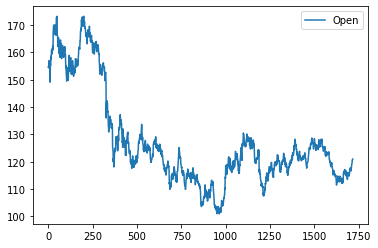

In [ ]:

opn.plot()

Import Library

In [ ]:
import matplotlib.pyplot as plt

Convert open price into 2-D array using numpy

In [ ]:
open_array = opn.values

In [ ]:
open_array

array([[154.740005],
       [154.309998],
       [155.479996],
       ...,
       [120.57    ],
       [120.800003],
       [120.980003]])

Plot the open_array values using matplotlib

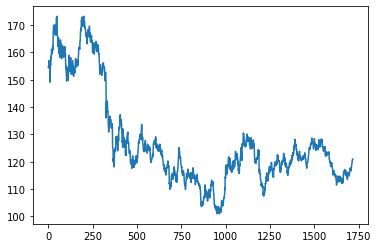

In [ ]:
plt.plot(open_array)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

**Now** MinMax scaler is used. Scaling means if we have more than x axis and we have to predict y values. Then MinMax scaler estimate larger value rather than smaller one.

Scaling simply means Normalise the data between 0 and 1


In [ ]:
normalise = MinMaxScaler(feature_range = (0,1))
open_arrayscaled = normalise.fit_transform(np.array(open_array).reshape(-1,1))

In [ ]:
len(open_array),len(open_arrayscaled)

(1718, 1718)

Define train and test data

In [ ]:
train_size = int(len(open_arrayscaled)*0.70)
test_size = len(open_arrayscaled)  - train_size

Define sizes

In [ ]:
train_size

1202

In [ ]:
test_size

516

Split Data into train and test dataset

In [ ]:
from sklearn.model_selection import train_test_split
ds_train,ds_test = open_arrayscaled[:train_size,:],open_arrayscaled[train_size:len(open_arrayscaled),:1]
print("length of train data:",len(ds_train))
print("length of test data:",len(ds_test))

length of train data: 1202
length of test data: 516


Creating dataset in time seies for LSTM model

In [ ]:
def create_ds(dataset,step):
  X_train,y_train = [], []
  for i in range(len(dataset) - step -1):
    a = dataset[i:(i+step),0]
    X_train.append(a)
    y_train.append(dataset[i + step,0])
    return np.array(X_train), np.array(y_train)

Taking 70 days price as on record for training

In [ ]:
time_stamp = 100
X_train,y_train = create_ds(ds_train,time_stamp)
X_test,y_test = create_ds (ds_test,time_stamp)

In [ ]:
X_train.shape,y_train.shape

((1, 100), (1,))

In [ ]:
X_test.shape,y_test.shape

((1, 100), (1,))

Creating data to fit into the model


In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

Creating LSTM model using keras


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [ ]:
model = Sequential()
model.add(LSTM (units = 50,return_sequences = True , input_shape  = (X_train.shape[1],1)))
model. add(LSTM(units = 50 ,return_sequences =  True))
model.add(LSTM(units = 50))
model.add(Dense(units = 1, activation = 'linear'))
model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


Training the model with adam optimizer and maen squared error loss function

In [ ]:

model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(X_train,y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 64)

Epoch 1/100
1/1 [==============================] - 9s 9s/step - loss: 0.5968 - val_loss: 0.0584
Epoch 2/100
1/1 [==============================] - 0s 152ms/step - loss: 0.4577 - val_loss: 0.0402
Epoch 3/100
1/1 [==============================] - 0s 147ms/step - loss: 0.3397 - val_loss: 0.0245
Epoch 4/100
1/1 [==============================] - 0s 164ms/step - loss: 0.2335 - val_loss: 0.0113
Epoch 5/100
1/1 [==============================] - 0s 154ms/step - loss: 0.1359 - val_loss: 0.0021
Epoch 6/100
1/1 [==============================] - 0s 162ms/step - loss: 0.0529 - val_loss: 8.7366e-04
Epoch 7/100
1/1 [==============================] - 0s 178ms/step - loss: 0.0035 - val_loss: 0.0137
Epoch 8/100
1/1 [==============================] - 0s 150ms/step - loss: 0.0186 - val_loss: 0.0323
Epoch 9/100
1/1 [==============================] - 0s 145ms/step - loss: 0.0684 - val_loss: 0.0365
Epoch 10/100
1/1 [==============================] - 0s 148ms/step - loss: 0.0710 - val_loss: 0.0288
Epoch 11

Plotting loss, it show how loss has decreased significantly

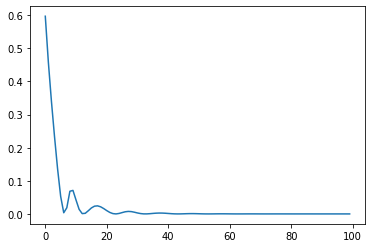

In [ ]:
loss = model.history.history['loss']
plt.plot(loss)

Predicting on train and test data

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
                             

Inverse tranform to get values

In [ ]:
train_predict = normalise.inverse_transform(train_predict)
test_predict = normalise.inverse_transform(test_predict)

Comparing using visuals (Data Visualization)

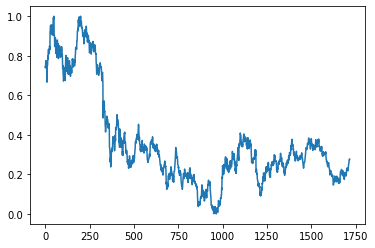

In [ ]:

plt.plot(normalise.inverse_transform(open_arrayscaled))
plt.plot(train_predict,linestyle = ":",linewidth = 4, markersize = 9)
plt.plot(test_predict,linestyle = ":",linewidth = 4, markersize = 9)

here data get overlap

In [ ]:
type(train_predict)

numpy.ndarray

In [ ]:
test = np.vstack((train_predict,test_predict))

Combining the predicted data to create uniform data visualization

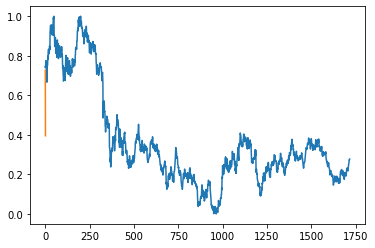

In [ ]:
plt.plot(normalise.inverse_transform(open_arrayscaled))
plt.plot(test)

Forecasting the next 30 days data

In [ ]:
print("length of test data",len(ds_test))

length of test data 516


getting last 70 days record

In [ ]:
future_input = ds_test[270:]

In [ ]:
future_input = future_input.reshape(1,-1)

In [ ]:
tmp_input = list(future_input)

In [ ]:
future_input.shape

(1, 246)

Creating list of last 70 data

In [ ]:
tmp_input = tmp_input[0].tolist()

Predicting next 30 days price by using current data. It will predict in sliding window manner (algorithm)

In [ ]:
last_output = []
n_steps = 49
i = 0
while(i<30):
  if(len(tmp_input) > 100):
    future_input = np.array(tmp_input[1:])
    future_input = future_input.reshape(1,-1)
    future_input = future_input.reshape((5,n_steps,1))
    yhat = model.predict(future_input,verbose = 0)
    tmp_input.extend(yhat[0].tolist())
    tmp_input = tmp_input[1:]
    last_output.extend(yhat.tolist())
    i=i+1

  else:
      future_input = future_input.reshape((1,n_steps,1))
      yhat = model.predict(future_input , verboss = 0)
      tmp_input.extend(yhat[0].tolist())
      last_output.extend(yhat.tolist())
      i=i+1



In [ ]:
print(last_output)

[[0.4460992217063904], [0.4268839955329895], [0.3525559604167938], [0.32128438353538513], [0.3661716878414154], [0.44540783762931824], [0.4256267845630646], [0.35088032484054565], [0.32303568720817566], [0.3697008788585663], [0.4447208046913147], [0.4245680868625641], [0.3492601215839386], [0.32490935921669006], [0.3747318983078003], [0.4441443383693695], [0.42364808917045593], [0.34771132469177246], [0.32693102955818176], [0.38131314516067505], [0.4438689053058624], [0.42284470796585083], [0.3461669087409973], [0.32902783155441284], [0.3892565667629242], [0.44399750232696533], [0.4221183955669403], [0.3445541262626648], [0.3311494290828705], [0.39823585748672485], [0.44448378682136536], [0.4214865267276764], [0.34270352125167847], [0.33327028155326843], [0.40787842869758606], [0.4452008306980133], [0.42094531655311584], [0.34056970477104187], [0.3353230953216553], [0.4178234338760376], [0.4459606111049652], [0.42049872875213623], [0.33822306990623474], [0.3372161388397217], [0.4277542

In [ ]:
len(open_arrayscaled)

1718

Creating a dumy plane to plot graph one after another 

In [ ]:
plot_new = np.arange(1,860)
plot_pred = np.arange(860,1718)
                      

ValueError: ignored

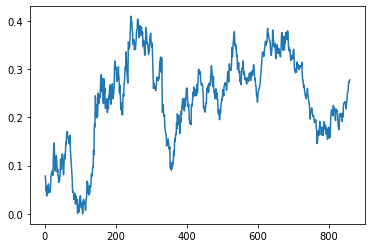

In [ ]:

plt.plot(plot_new,normalise.inverse_transform(open_arrayscaled[859:]))
plt.plot(plot_pred,normalise.inverse_transform(last_output))

In [ ]:
ds_new = open_arrayscaled.tolist()



In [ ]:
len(ds_new)

1718

Extends help to fill missing values by approx value

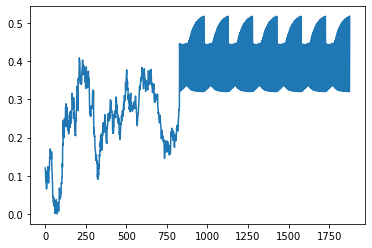

In [ ]:
ds_new.extend(last_output)
plt.plot(ds_new[890:])

Create final data for plotting

In [ ]:
final_graph = normalise.inverse_transform(ds_new).tolist()

Plotting final result with predicted value after 30 days

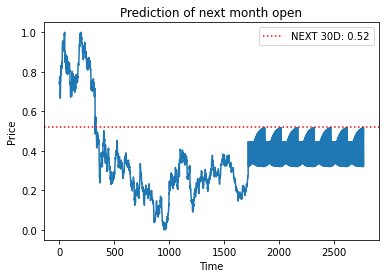

In [ ]:
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("Prediction of next month open")
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()